In [1]:
## processing
import math
import numpy as np
import pandas as pd
from scipy import optimize

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Initial try at building phase diagram

In [2]:
df = pd.read_csv('../data/percolation-phases.csv')

In [3]:
df.head()

,series,run,length,percent_long,globally_contract
0,4,0,2,10,0
1,4,1,3,10,0
2,4,2,4,10,0
3,4,3,5,10,0
4,4,4,6,10,0


In [4]:
df_global = df[df.globally_contract == 1]
df_local = df[df.globally_contract == 0]

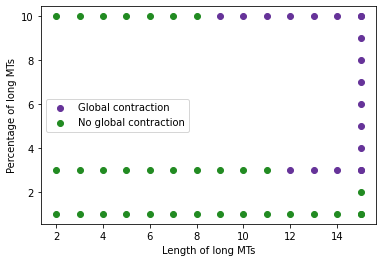

In [5]:
fig, ax = plt.subplots()
ax.scatter(df_global['length'], df_global['percent_long'], color='rebeccapurple')
ax.scatter(df_local['length'], df_local['percent_long'], color='forestgreen')
ax.set_xlabel('Length of long MTs')
ax.set_ylabel('Percentage of long MTs')
ax.legend(['Global contraction', 'No global contraction'])
plt.show()

In [22]:
def find_circle(x, xc, yc, r):
    y_upper = yc + np.sqrt(r**2 - (x - xc)**2)
    y_lower = yc - np.sqrt(r**2 - (x - xc)**2)
    return y_upper, y_lower


def in_circle(row, xc_2, yc_2, R_2):
    x_coord = row['posX']
    if x_coord < (xc_2 - R_2) or x_coord > (xc_2 + R_2):
        return 0
    else:
        upper_bound, lower_bound = find_circle(x_coord, xc_2, yc_2, R_2)
        y_coord = row['posY']
        if y_coord > upper_bound or y_coord < lower_bound:
            return 0
        else:
            return 1


def in_aster_fraction(row):
    series_index = row['series']
    run_index = row['run']
    if run_index < 10:
        fpath = '~/thomsonlab/simulation/percolation/run-series{}/run000{}/fiber_position.txt'.format(series_index, run_index)
    else:
        fpath = '~/thomsonlab/simulation/percolation/run-series{}/run00{}/fiber_position.txt'.format(series_index, run_index)

    df = pd.read_table(fpath,
                skiprows=5,
                delim_whitespace=True,
                names=['class', 'identity', 'length', 'posX', 'posY', 'dirX', 'dirY', 'endToEnd', 'cosinus', 'organizer'])
    
    df_short = df[df.length == 1]
    df_long = df[df.length > 1]
    x_long, y_long = df_long['posX'].tolist(), df_long['posY'].tolist()

    def calc_R(xc, yc):
        return np.sqrt((x_long-xc)**2 + (y_long-yc)**2)

    def f_2(c):
        Ri = calc_R(*c)
        return Ri - Ri.mean()
    
    center_2, ier = optimize.leastsq(f_2, (0, 0))
    xc_2, yc_2 = center_2
    R_2 = calc_R(*center_2).mean()

    col = df_short.apply(in_circle, args=(xc_2, yc_2, R_2), axis=1)
    df_short = df_short.assign(in_circle=col.values)

    #expected_fraction = math.pi * R_2**2 / (math.pi * 16.92**2)

    return sum(df_short['in_circle']) / len(df_short)

In [8]:
df.head()

,series,run,length,percent_long,globally_contract,in_aster_frac
0,4,0,2,10,0,0.391111
1,4,1,3,10,0,0.400000
2,4,2,4,10,0,0.388889
3,4,3,5,10,0,0.346667
4,4,4,6,10,0,0.537778


In [7]:
col = df.apply(in_aster_fraction, axis=1)
df = df.assign(in_aster_frac=col.values)

In [9]:
df = df.groupby(['length', 'percent_long']).mean().reset_index()

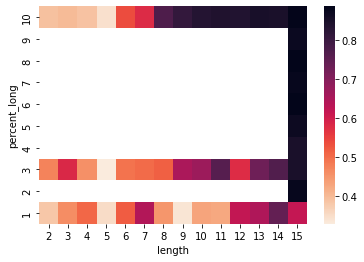

In [12]:
df_pivoted = df.pivot("percent_long", "length", "in_aster_frac")

fig, axes = plt.subplots()
ax = sns.heatmap(df_pivoted, cmap=sns.cm.rocket_r)
ax.invert_yaxis()
plt.show()

## Building the full phase diagram

In [10]:
df_list = []
for file_number in range(140):
    filename = '/Users/rosalindpan/thomsonlab/simulation/percolation/full-param-search2/config{}.cym'.format(
                    (4-len(str(file_number)))*'0'+str(file_number))
    file = open(filename, 'r')
    lines = file.readlines()
    num_long = int(lines[34].split()[1])
    length = int(lines[36].strip().split()[2])
    percent_long = int(num_long * length / 1000 * 100)
    if (percent_long) % 2 != 0:
        percent_long += 1
    rv = {'series': 2, 'run': file_number, 'length': length, 'percent_long': percent_long, 'globally_contract':0}
    df_list.append(rv)

In [11]:
df = pd.DataFrame(df_list)

In [12]:
df.head(10)

,series,run,length,percent_long,globally_contract
0,2,0,2,20,0
1,2,1,3,20,0
2,2,2,4,20,0
3,2,3,5,20,0
4,2,4,6,20,0
5,2,5,7,20,0
6,2,6,8,20,0
7,2,7,9,20,0
8,2,8,10,20,0
9,2,9,11,20,0


In [13]:
df_list = []
for file_number in range(70):
    filename = '/Users/rosalindpan/thomsonlab/simulation/percolation/full-param-search3/config{}.cym'.format(
                    (4-len(str(file_number)))*'0'+str(file_number))
    file = open(filename, 'r')
    lines = file.readlines()
    num_long = int(lines[34].split()[1])
    length = int(lines[36].strip().split()[2])
    percent_long = int(num_long * length / 1000 * 100)
    if (percent_long) % 2 != 0:
        percent_long += 1
    rv = {'series':3, 'run': file_number, 'length': length, 'percent_long': percent_long, 'globally_contract':0}
    df_list.append(rv)

In [14]:
df2 = pd.DataFrame(df_list)

In [15]:
df2.head()

,series,run,length,percent_long,globally_contract
0,3,0,2,10,0
1,3,1,3,10,0
2,3,2,4,10,0
3,3,3,5,10,0
4,3,4,6,10,0


In [16]:
df_total = pd.concat([df, df2], ignore_index=True)

In [17]:
len(df_total)

210

In [19]:
df_total.to_csv('../data/percolation-full.csv', index=False)

In [20]:
def in_aster_fraction(row):
    series_index = int(row['series'])
    run_index = int(row['run'])
    if run_index < 10:
        fpath = '~/thomsonlab/simulation/percolation/full-param-search{}/run000{}/fiber_position.txt'.format(series_index, run_index)
    elif run_index < 100:
        fpath = '~/thomsonlab/simulation/percolation/full-param-search{}/run00{}/fiber_position.txt'.format(series_index, run_index)
    else:
        fpath = '~/thomsonlab/simulation/percolation/full-param-search{}/run0{}/fiber_position.txt'.format(series_index, run_index)

    df = pd.read_table(fpath,
                skiprows=5,
                delim_whitespace=True,
                names=['class', 'identity', 'length', 'posX', 'posY', 'dirX', 'dirY', 'endToEnd', 'cosinus', 'organizer'])
    
    df_short = df[df.length == 1]
    df_long = df[df.length > 1]
    x_long, y_long = df_long['posX'].tolist(), df_long['posY'].tolist()

    def calc_R(xc, yc):
        return np.sqrt((x_long-xc)**2 + (y_long-yc)**2)

    def f_2(c):
        Ri = calc_R(*c)
        return Ri - Ri.mean()
    
    center_2, ier = optimize.leastsq(f_2, (0, 0))
    xc_2, yc_2 = center_2
    R_2 = calc_R(*center_2).mean()

    col = df_short.apply(in_circle, args=(xc_2, yc_2, R_2), axis=1)
    df_short = df_short.assign(in_circle=col.values)

    #expected_fraction = math.pi * R_2**2 / (math.pi * 16.92**2)

    return sum(df_short['in_circle']) / len(df_short)

In [25]:
col = df_total.apply(in_aster_fraction, axis=1)
df_total = df_total.assign(in_aster_frac=col.values)

ValueError: Expected a 1D array, got an array with shape (0, 10)

In [18]:
df = df.groupby(['length', 'percent_long']).mean().reset_index()

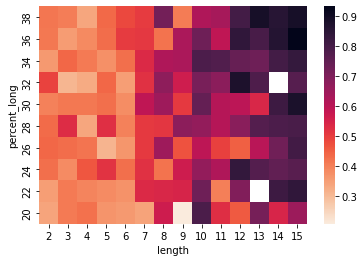

In [19]:
df_pivoted = df.pivot("percent_long", "length", "in_aster_frac")

fig, axes = plt.subplots()
ax = sns.heatmap(df_pivoted, cmap=sns.cm.rocket_r)
ax.invert_yaxis()
plt.show()

In [27]:
df[(df.length == 14) & (df.percent_long == 32)]

,length,percent_long,run,globally_contract,in_aster_frac


## Alternative method of identifying asters

In [3]:
fpath = '~/thomsonlab/simulation/percolation/run-series7/run0009/fiber_position.txt'

df = pd.read_table(fpath,
            skiprows=5,
            delim_whitespace=True,
            names=['class', 'identity', 'length', 'posX', 'posY', 'dirX', 'dirY', 'endToEnd', 'cosinus', 'organizer'])

In [4]:
df.head()

,class,identity,length,posX,posY,dirX,dirY,endToEnd,cosinus,organizer
0,1,1,1.0,1.8240,-7.1372,0.6634,-0.7483,1.0,1.0,0.0
1,1,2,1.0,4.1773,6.0311,0.9514,-0.3080,1.0,1.0,0.0
2,1,3,1.0,1.1767,-8.2899,-0.4191,0.9079,1.0,1.0,0.0
3,1,4,1.0,2.6602,-7.4675,-0.9961,-0.0883,1.0,1.0,0.0
4,1,5,1.0,-5.3882,3.8631,0.5535,-0.8328,1.0,1.0,0.0


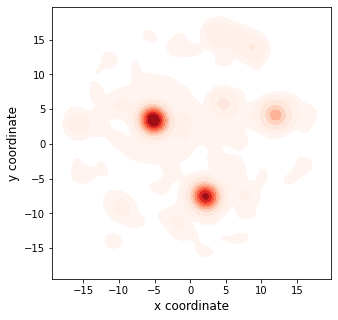

In [11]:
fig, ax = plt.subplots(figsize=(5,5))
sns.kdeplot(x=df['posX'], y=df['posY'], cmap="Reds", shade=True, bw_adjust=.5)
ax.set_xlabel('x coordinate', fontsize=12)
ax.set_ylabel('y coordinate', fontsize=12)
plt.show()